In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
from datetime import datetime, timedelta
import pandas as pd
from tqdm.notebook import tqdm, trange
import glob
import matplotlib.dates as mdates


In [5]:
#Import SlowControls class from this git repo
import sys
sys.path.append('../ReadLogFiles/')
import SlowControls

# Load data file into dataframe

In [56]:
data_file_path = "insert relative path here" #will bug unless you change
infiles = glob.glob(data_file_path+"*.dat")
print(infiles)

colmap_path = "../ColumnMaps/LS_colmap_4-14-22.yml"
with open('colmap.yml','r') as infile:
    colmap = yaml.safe_load(infile) # column map stored as a yaml file


for i in range(len(colmap['indices'])):
    print(str(colmap['indices'][i]) + " \t\t\t" + colmap['labels'][i])


0 			date
1 			T_Cu_bottom
2 			T_cell_top
3 			T_cell_mid
4 			T_cell_bot
5 			T_Cu_top
6 			T_ambient
7 			T_in
8 			T_top_flange
10 			T_set_min
11 			T_set_max
21 			mass_flow
22 			P_XP3
23 			P_XP5
24 			P_CCG
18 			cool_on
38 			water_flow
39 			discharge_pressure
40 			suction_pressure
41 			coil_in_temp
42 			coil1_out_temp
43 			water_temp
44 			fridge_CT
45 			coil2_out_temp
['LSdata/LS_20220406_185414.dat', 'LSdata/LS_20220406_230217.dat', 'LSdata/LS_20220407_041559.dat', 'LSdata/LS_20220406_235550.dat', 'LSdata/LS_20220331_074701.dat', 'LSdata/LS_20220407_002547.dat', 'LSdata/LS_20220406_095245.dat', 'LSdata/LS_20220406_212319.dat', 'LSdata/LS_20220407_134322.dat']


In [57]:

d = SlowControls.SlowControls(infiles, system="LS", labels=colmap['labels'], indices=colmap['indices'])


Opening dataset in LSdata/LS_20220406_185414.dat...


Processing lines...: 528it [00:00, 1276.13it/s]



Opening dataset in LSdata/LS_20220406_230217.dat...


Processing lines...: 39it [00:00, 1072.43it/s]



Opening dataset in LSdata/LS_20220407_041559.dat...


Processing lines...: 2413it [00:02, 1193.21it/s]



Opening dataset in LSdata/LS_20220406_235550.dat...


Processing lines...: 50it [00:00, 1029.32it/s]



Opening dataset in LSdata/LS_20220331_074701.dat...


Processing lines...: 52530it [00:41, 1266.48it/s]



Opening dataset in LSdata/LS_20220407_002547.dat...


Processing lines...: 881it [00:00, 1253.65it/s]



Opening dataset in LSdata/LS_20220406_095245.dat...


Processing lines...: 2647it [00:02, 1237.85it/s]



Opening dataset in LSdata/LS_20220406_212319.dat...


Processing lines...: 214it [00:00, 1170.07it/s]



Opening dataset in LSdata/LS_20220407_134322.dat...


Processing lines...: 21754it [00:16, 1281.58it/s]



Found 81056 readings between 03/31/2022 10:47:01 and 04/11/2022 11:22:04.
Sorting by date

Created pandas dataframe containing slow controls data.

Time: 68.952 seconds.



In [12]:
d.PrintTimeBounds()

From 2022-03-31 10:47:01.128000 to 2022-04-06 12:43:46.433000


# Full plot

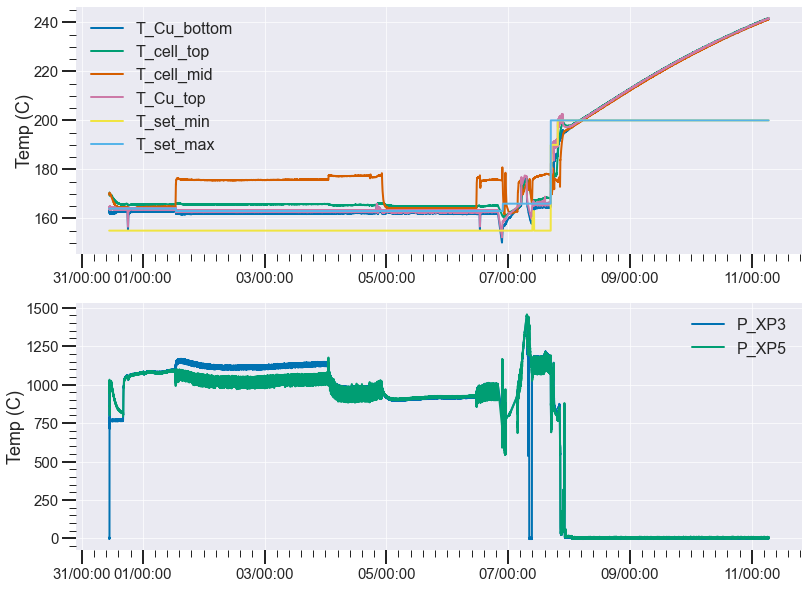

In [19]:
start_dates = [datetime(2022,3,31,10,0,0)]
end_dates = [datetime(2022,4,11,6,40,0)]
to_plot = [['T_Cu_bottom','T_cell_top','T_cell_mid','T_Cu_top', 'T_set_min','T_set_max'], ['P_XP3','P_XP5']]
fig, axs = plt.subplots(figsize=(13, 10), nrows=len(to_plot))
dates = d.GetDateArray(start_dates[0],end_dates[0])
for i, sub in enumerate(to_plot):
    ax = axs[i]
    for q in sub:
        signal = d.GetQuantityArray(q, start_dates[0], end_dates[0])
        ax.plot(dates, signal, label=q)
        if("pressure" in q):
            ax.set_ylabel("Torr")
        else:
            ax.set_ylabel("Temp (C)")
            
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%H:%M'))
    ax.legend()

plt.show()

# Fridge pressures and controls

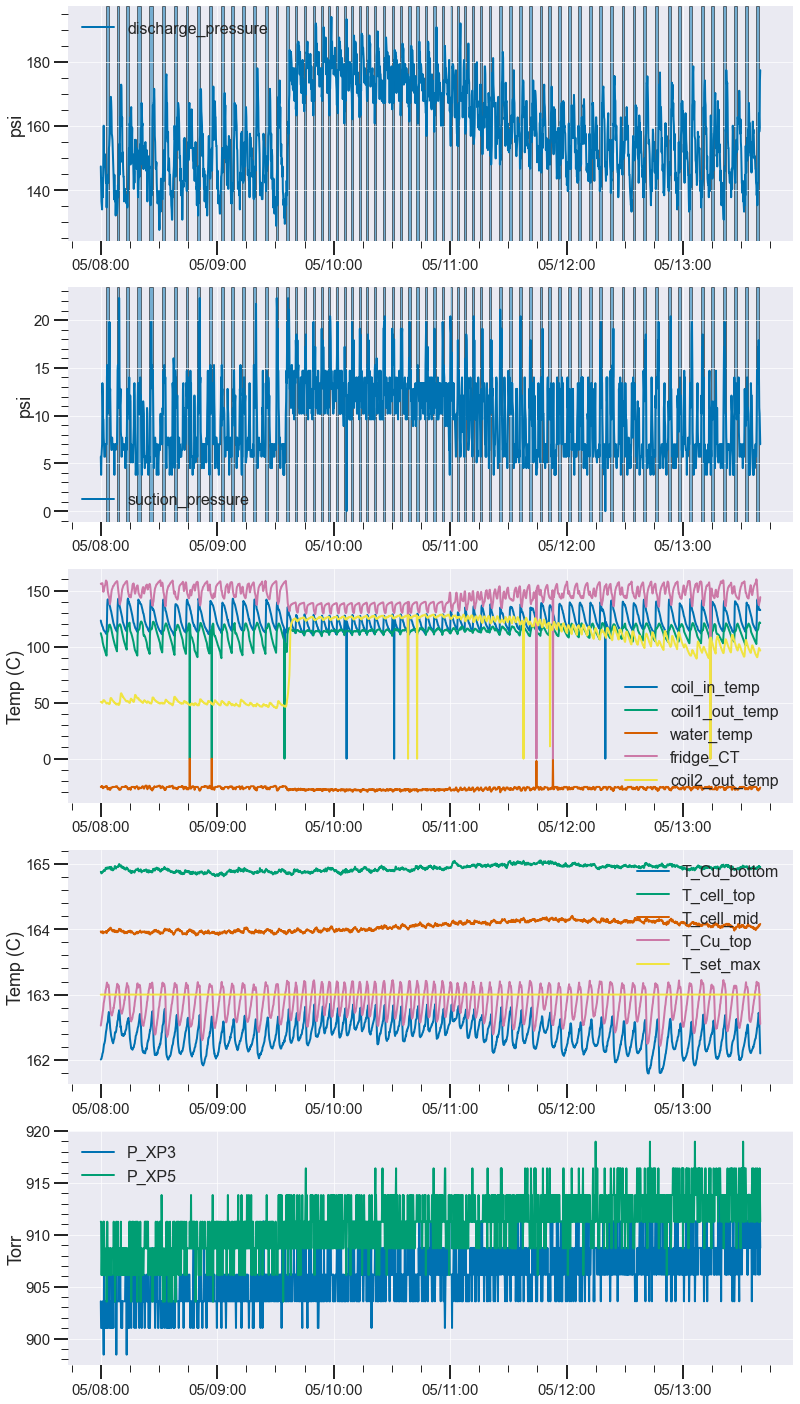

In [53]:
start_dates = [datetime(2022,4,5,8,0,0)]
end_dates = [datetime(2022,4,5,13,40,0)]
to_plot = [['discharge_pressure', 'cool_on'], ['suction_pressure', 'cool_on'],\
           ['coil_in_temp', 'coil1_out_temp', 'water_temp', 'fridge_CT', 'coil2_out_temp'], \
          ['T_Cu_bottom','T_cell_top','T_cell_mid','T_Cu_top','T_set_max'],\
           ['P_XP3','P_XP5']]
fig, axs = plt.subplots(figsize=(13, 5*len(to_plot)), nrows=len(to_plot))
dates = d.GetDateArray(start_dates[0],end_dates[0])
for i, sub in enumerate(to_plot):
    ax = axs[i]
    for q in sub:
        signal = d.GetQuantityArray(q, start_dates[0], end_dates[0])
        if(q == 'cool_on'):
            transitions = np.where(np.diff(signal - 0.5))[0]
            for tidx in np.arange(0, len(transitions), 2):
                ax.axvspan(dates[transitions[int(tidx)]], dates[transitions[int(tidx)+1]], alpha=0.5)
            continue
        ax.plot(dates, signal, label=q)
        if("pressure" in q):
            ax.set_ylabel("psi")
        elif("P_" in q):
            ax.set_ylabel("Torr")
        else:
            ax.set_ylabel("Temp (C)")
            
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%H:%M'))
    ax.legend()

plt.show()

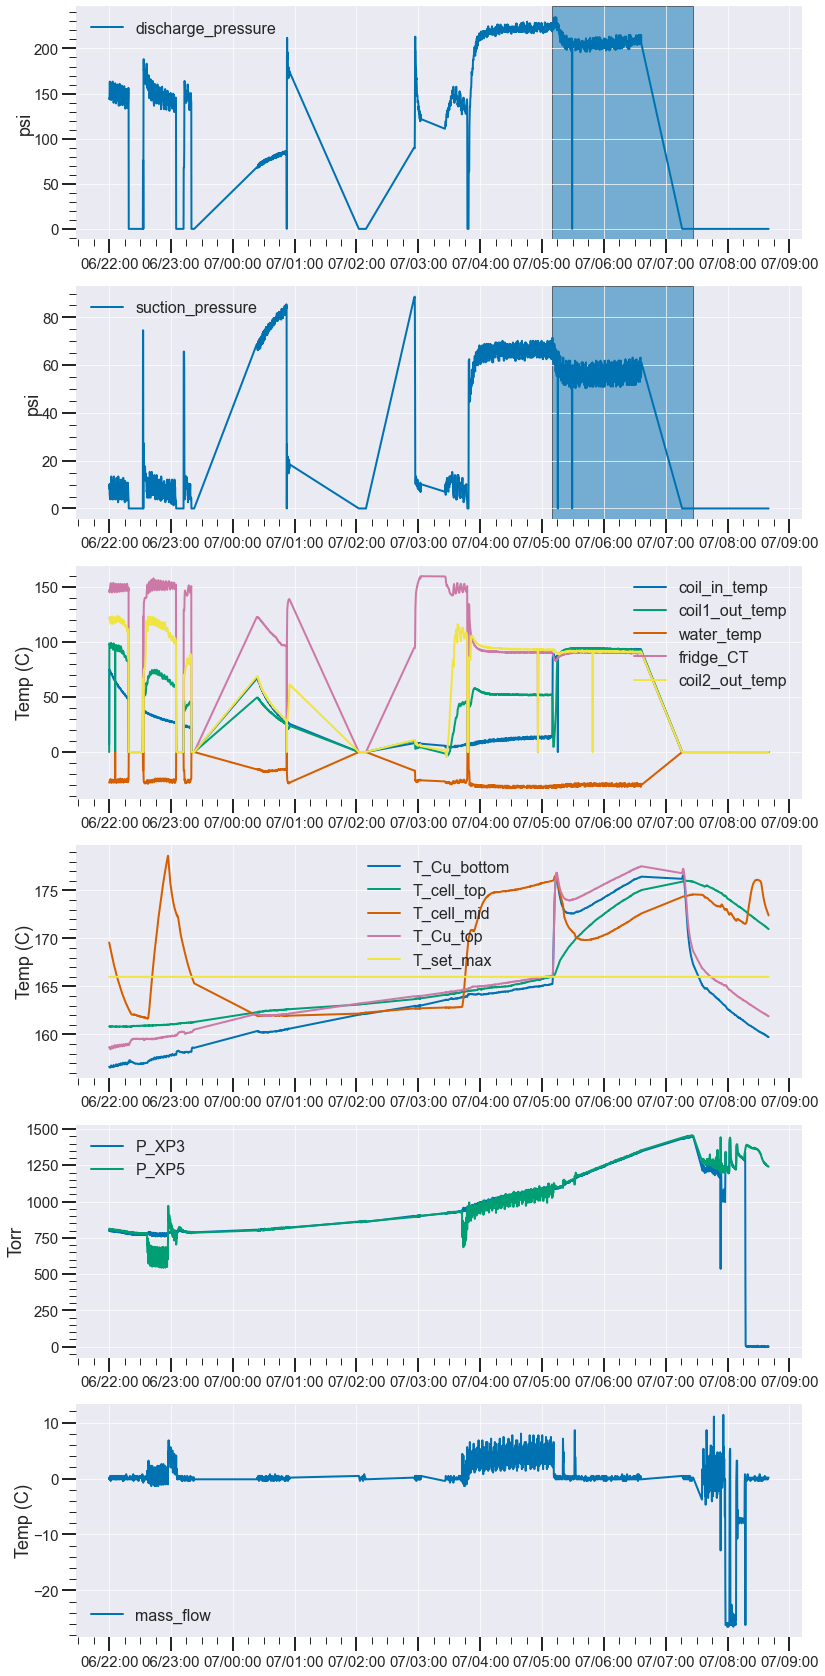

In [65]:
start_dates = [datetime(2022,4,6,22,0,0)]
end_dates = [datetime(2022,4,7,8,40,0)]
to_plot = [['discharge_pressure', 'cool_on'], ['suction_pressure', 'cool_on'],\
           ['coil_in_temp', 'coil1_out_temp', 'water_temp', 'fridge_CT', 'coil2_out_temp'], \
          ['T_Cu_bottom','T_cell_top','T_cell_mid','T_Cu_top','T_set_max'],\
           ['P_XP3','P_XP5'], \
          ['mass_flow']]
fig, axs = plt.subplots(figsize=(13, 5*len(to_plot)), nrows=len(to_plot))
dates = d.GetDateArray(start_dates[0],end_dates[0])
for i, sub in enumerate(to_plot):
    ax = axs[i]
    for q in sub:
        signal = d.GetQuantityArray(q, start_dates[0], end_dates[0])
        if(q == 'cool_on'):
            transitions = np.where(np.diff(signal - 0.5))[0]
            if(len(transitions) < 2): 
                continue
            for tidx in np.arange(0, len(transitions), 2):
                ax.axvspan(dates[transitions[int(tidx)]], dates[transitions[int(tidx)+1]], alpha=0.5)
            continue
        ax.plot(dates, signal, label=q)
        if("pressure" in q):
            ax.set_ylabel("psi")
        elif("P_" in q):
            ax.set_ylabel("Torr")
        else:
            ax.set_ylabel("Temp (C)")
            
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%H:%M'))
    ax.legend()


# Finding rate of pressure / temp rise 

Pressure range 2.608507777783606
Pressure range 1.6936111111111112
Temp range 2.961648055579927
Temp range 1.104999722176128
Temp range 0.9966672222481834


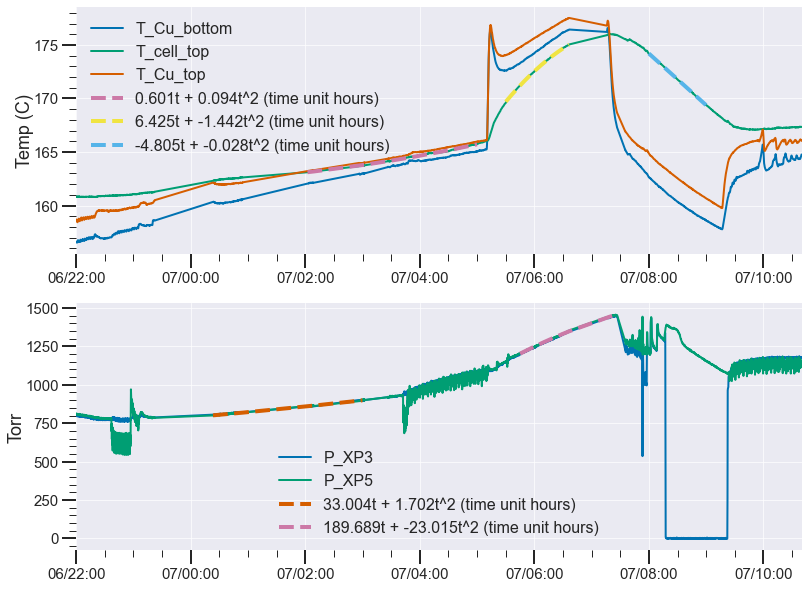

In [88]:
start_dates = [datetime(2022,4,6,22,0,0)]
end_dates = [datetime(2022,4,7,10,40,0)]
to_plot = [['T_Cu_bottom','T_cell_top','T_Cu_top'],\
           ['P_XP3','P_XP5']]

fig, axs = plt.subplots(figsize=(13, 5*len(to_plot)), nrows=len(to_plot))
dates = d.GetDateArray(start_dates[0],end_dates[0])
for i, sub in enumerate(to_plot):
    ax = axs[i]
    for q in sub:
        signal = d.GetQuantityArray(q, start_dates[0], end_dates[0])
        if(q == 'cool_on'):
            transitions = np.where(np.diff(signal - 0.5))[0]
            if(len(transitions) < 2): 
                continue
            for tidx in np.arange(0, len(transitions), 2):
                ax.axvspan(dates[transitions[int(tidx)]], dates[transitions[int(tidx)+1]], alpha=0.5)
            continue
        ax.plot(dates, signal, label=q)
        if("pressure" in q):
            ax.set_ylabel("psi")
        elif("P_" in q):
            ax.set_ylabel("Torr")
        else:
            ax.set_ylabel("Temp (C)")
            
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%H:%M'))
    ax.legend()
    

#fitting code, fits a few regions and reports the results
to_fit = {'P_XP5':[[datetime(2022,4,6,23,30,0), datetime(2022,4,7,3,0,0)], \
                   [datetime(2022,4,7,5,45,0), datetime(2022,4,7,7,30,0)]], \
          'T_cell_top':[[datetime(2022,4,7,1,0,0), datetime(2022,4,7,5,0,0)], \
                       [datetime(2022,4,7,5,30,0), datetime(2022,4,7,7,5,0)],\
                       [datetime(2022,4,7,8,0,0), datetime(2022,4,7,9,0,0)]]}

degree = 2 #second degree poly for all regions
for q in to_fit.keys():
    regions = to_fit[q]
    for reg in regions:
        sig = d.GetQuantityArray(q, reg[0], reg[1])
        dt_times = d.GetDateArray(reg[0], reg[1]) #datetimes
        times = [datetime.timestamp(_) - datetime.timestamp(dt_times[0]) for _ in dt_times] #timestamps
        z = np.polyfit(times, sig, degree)
        #1d to get an interpolator
        p2 = np.poly1d(z)
        
        if("P_" in q):
            print("Pressure range " + str((times[-1] - times[0])/3600))
            axs[1].plot(dt_times, p2(times), '--',linewidth=4, label="{:0.3f}t + {:0.3f}t^2 (time unit hours)".format(3600*z[1], 3600*3600*z[0]))
        else:
            print("Temp range " + str((times[-1] - times[0])/3600))
            axs[0].plot(dt_times, p2(times), '--',linewidth=4, label="{:0.3f}t + {:0.3f}t^2 (time unit hours)".format(3600*z[1], 3600*3600*z[0]))
        
axs[1].legend()
axs[0].legend()
axs[0].set_xlim(start_dates[0], end_dates[0])
axs[1].set_xlim(start_dates[0], end_dates[0])
plt.show()